### GOLD RATE Prediction using Gradient Boosting Regressor

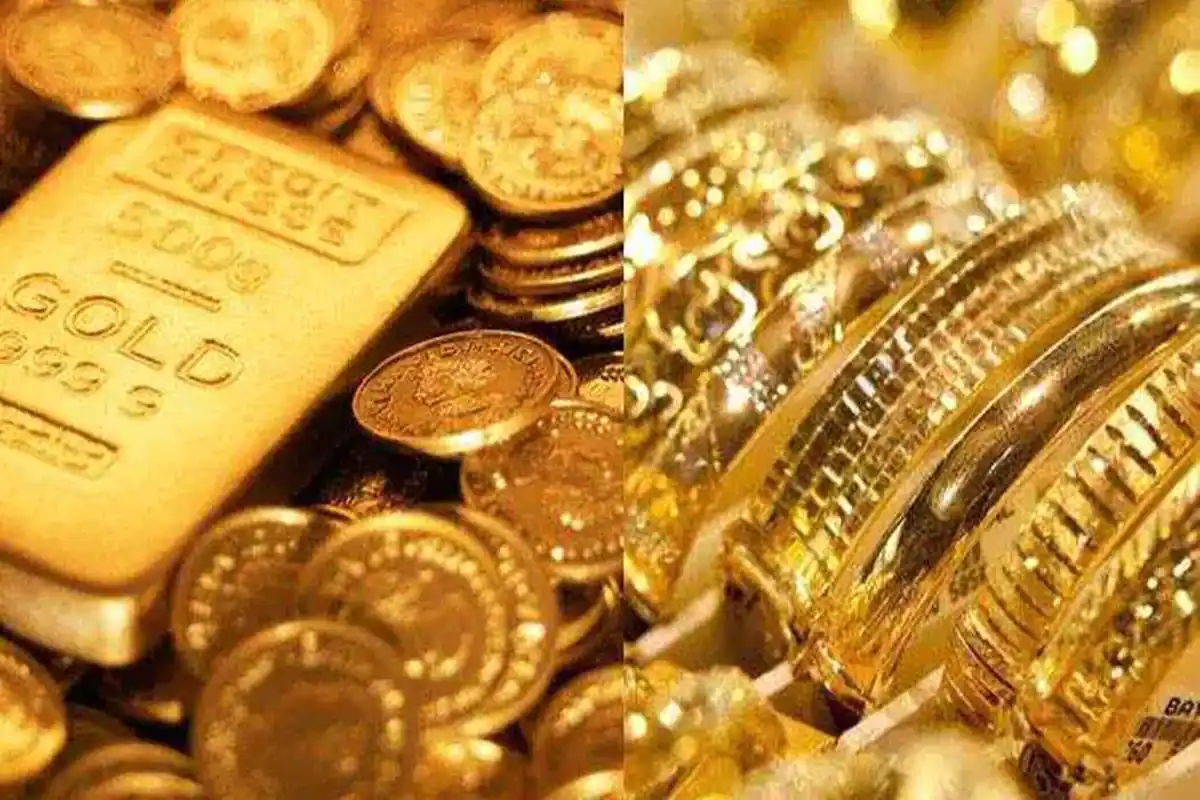

####  Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as k
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,  \
GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

#### To load the dataset, we will be using pd.csv() it will convert the dataset into a dataframe and have a look into the top 5 rows of dataset using pd.head () function

In [2]:
df=pd.read_csv('./GoldUP.csv')
df.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [3]:
df.isnull().mean()*100

Date             0.0
Gold_Price       0.0
Crude_Oil        0.0
Interest_Rate    0.0
USD_INR          0.0
Sensex           0.0
CPI              0.0
USD_Index        0.0
dtype: float64

#### Exploratory Data Analysis [EDA]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


In [5]:
df.shape

(239, 8)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gold_Price,239.0,19299.062762,11668.913490,4267.000000,6712.500000,19056.000000,29364.00000,52917.000000
Crude_Oil,239.0,3397.686318,1551.627401,887.420000,2180.695000,3303.550000,4492.93000,6926.830000
Interest_Rate,239.0,6.715900,1.188309,4.250000,6.000000,6.000000,7.00000,10.250000
USD_INR,239.0,53.804819,10.311144,39.366685,45.467395,48.664774,63.86103,76.222334
Sensex,239.0,18172.443891,11032.206600,2811.600000,8263.400000,17464.810000,26662.39500,41253.740000
CPI,239.0,73.372050,29.106141,36.730000,45.190000,68.470000,101.37000,129.300000
USD_Index,239.0,90.182510,11.312607,71.800000,81.110000,88.940000,97.16000,120.240000


### Univariate Analysis

### DISTPLOT

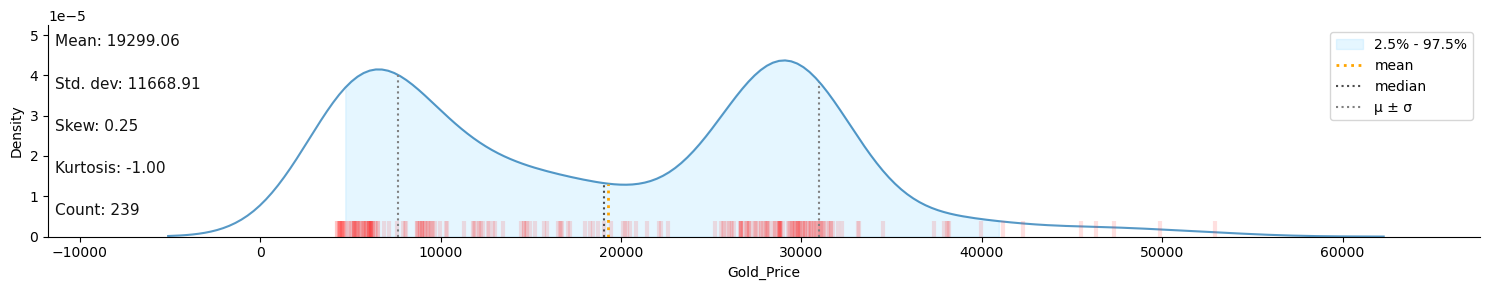

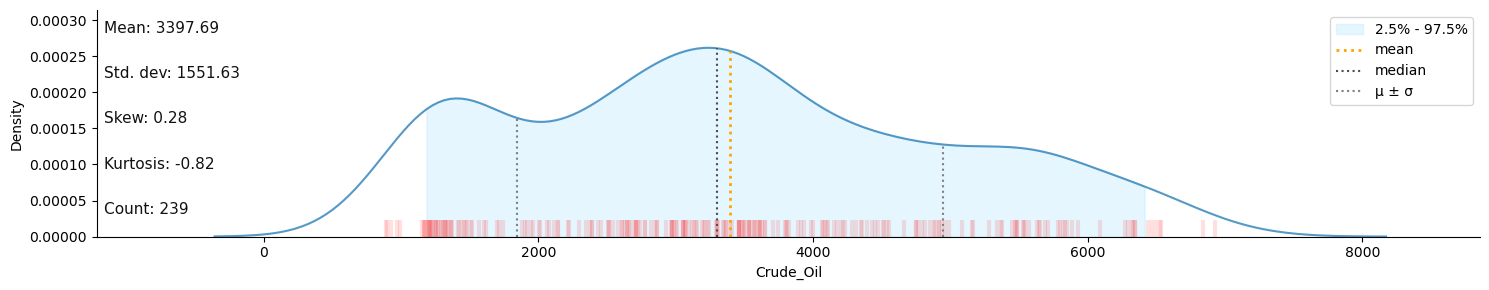

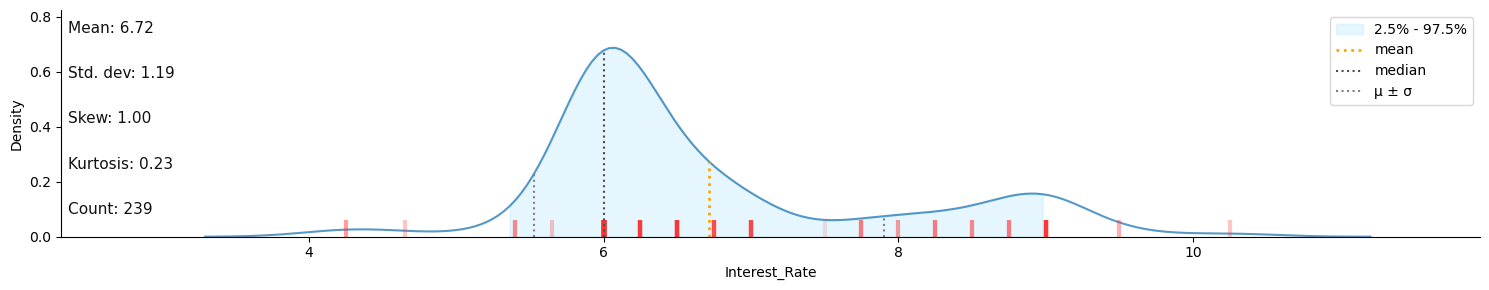

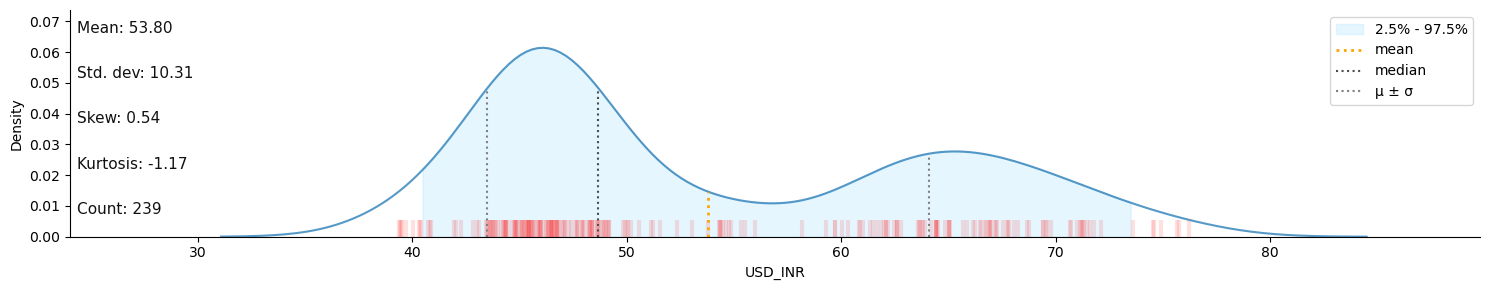

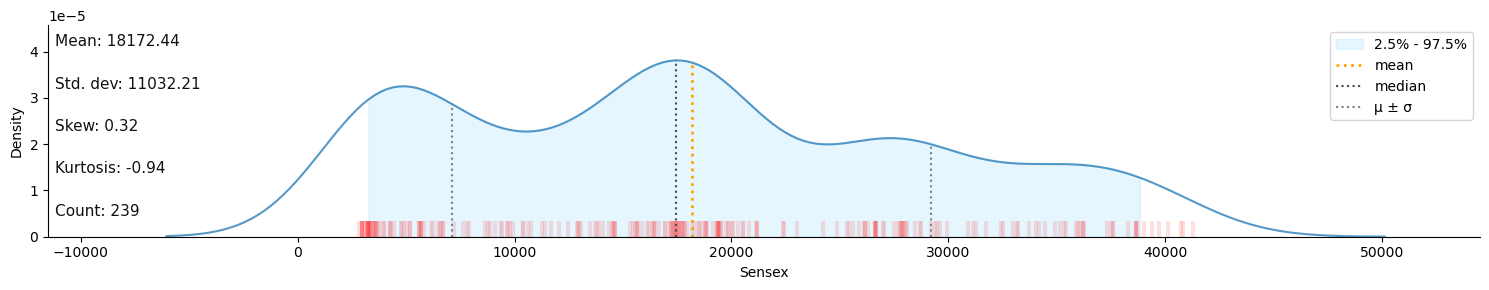

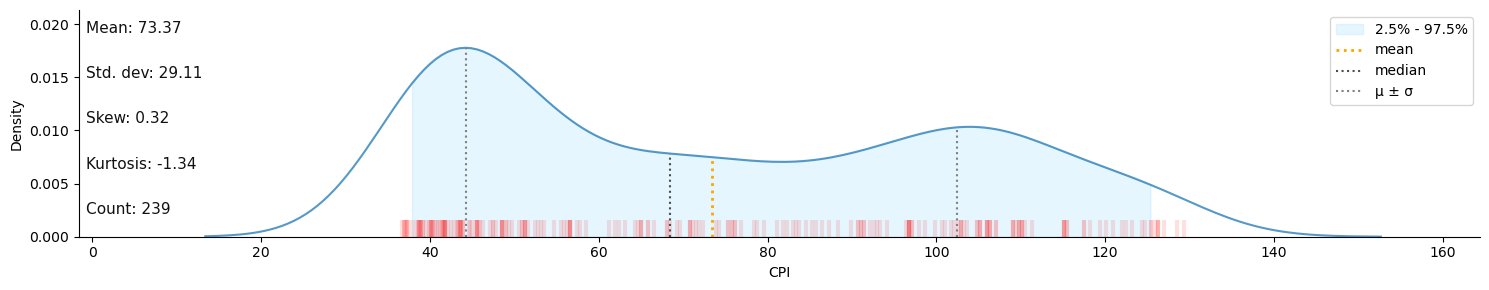

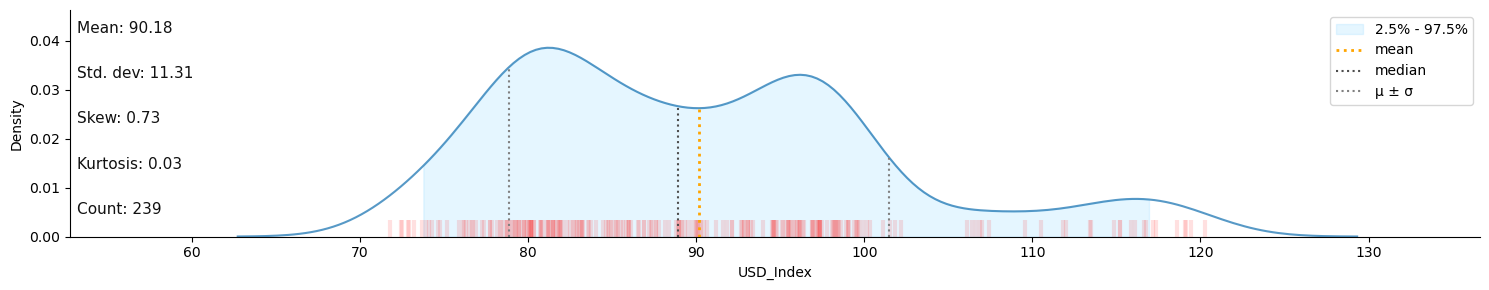

In [7]:
k.dist_plot(df);

#### Plot the numerical attributes by using hist method

### HISTPLOT

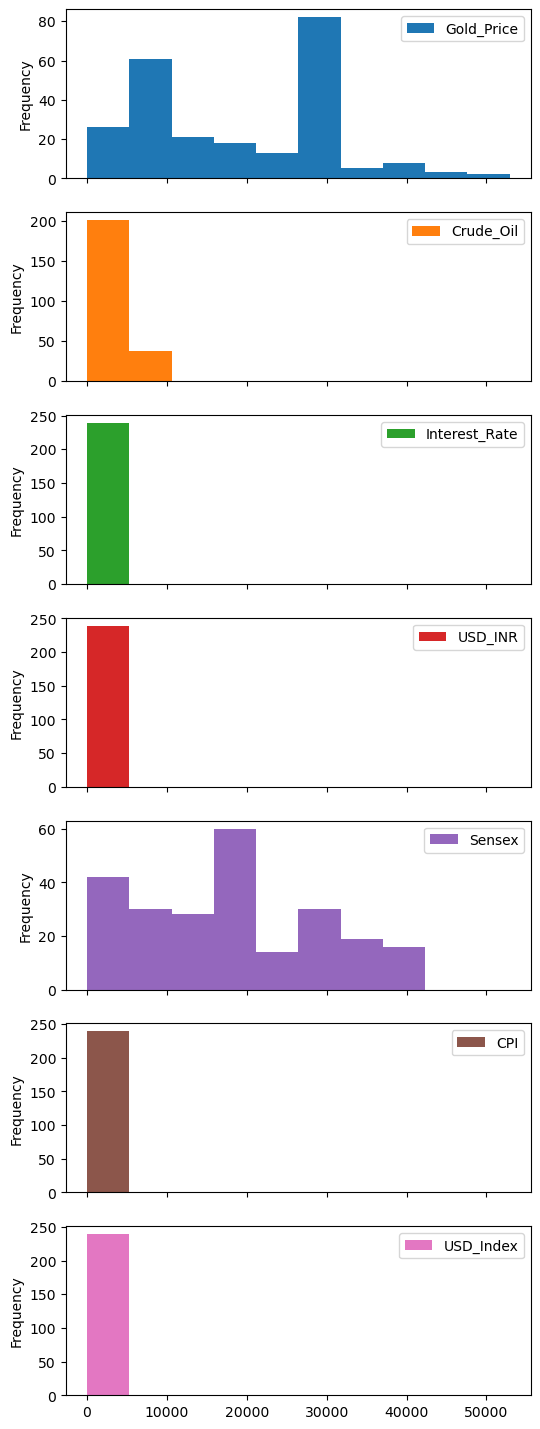

In [33]:
df.plot.hist(figsize=(6,18), subplots =True);
plt.show()

### BOXPLOT

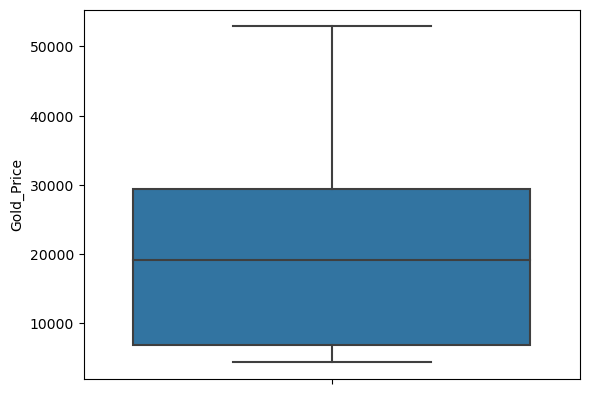

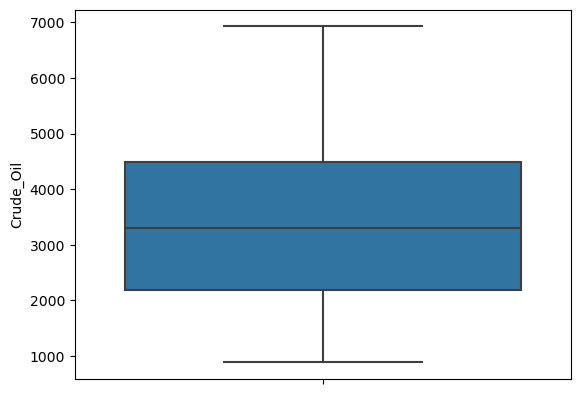

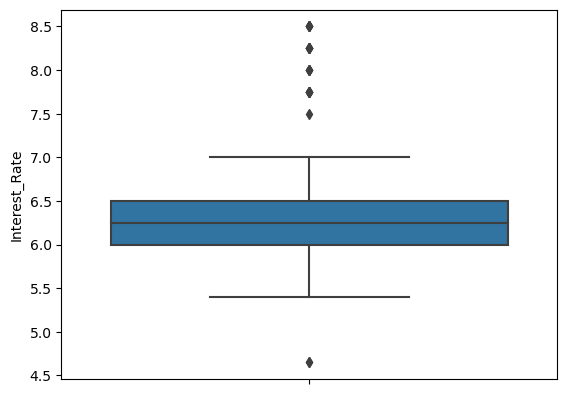

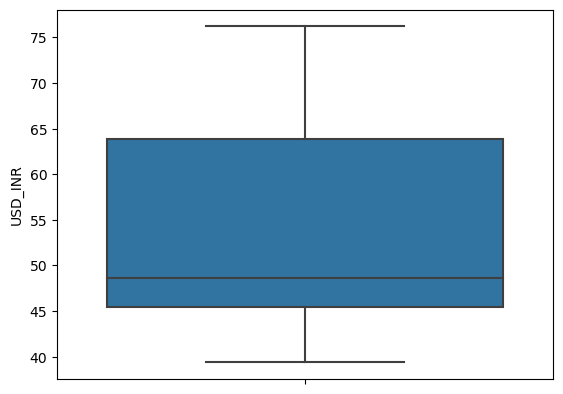

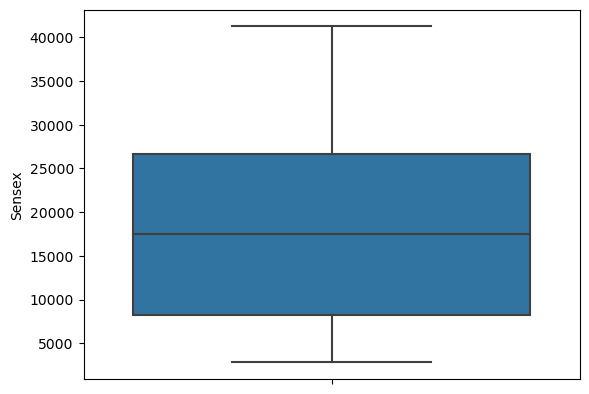

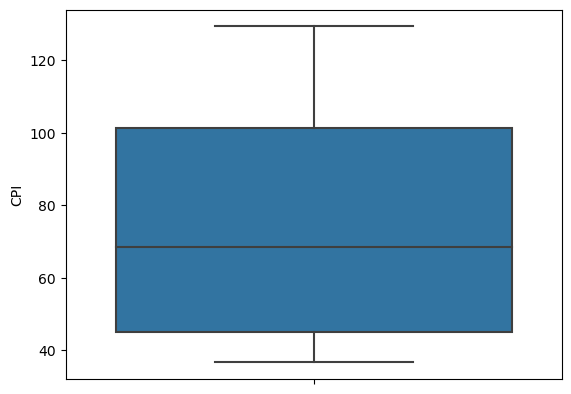

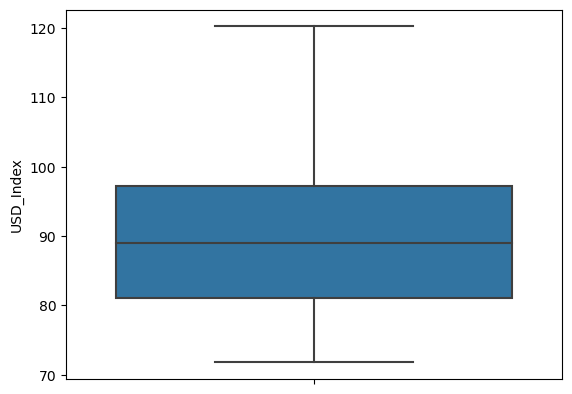

In [34]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.boxplot(y= df[i])
        plt.show()

### Multivariate Analysis

In [10]:
df.plot.kde(figsize=(10,3.8));

In [11]:
df.plot.kde(figsize=(15,10), subplots = True);

### Treating outliers

In [12]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL= Q1-1.5*IQR
    return UL, LL

In [13]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL)|(df[column]<LL), np.nan, df[column])

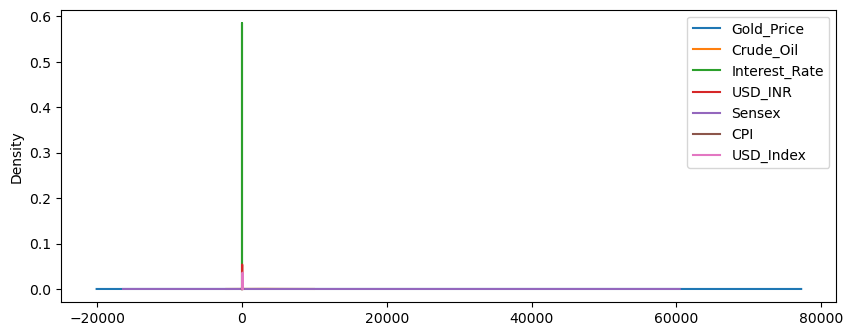

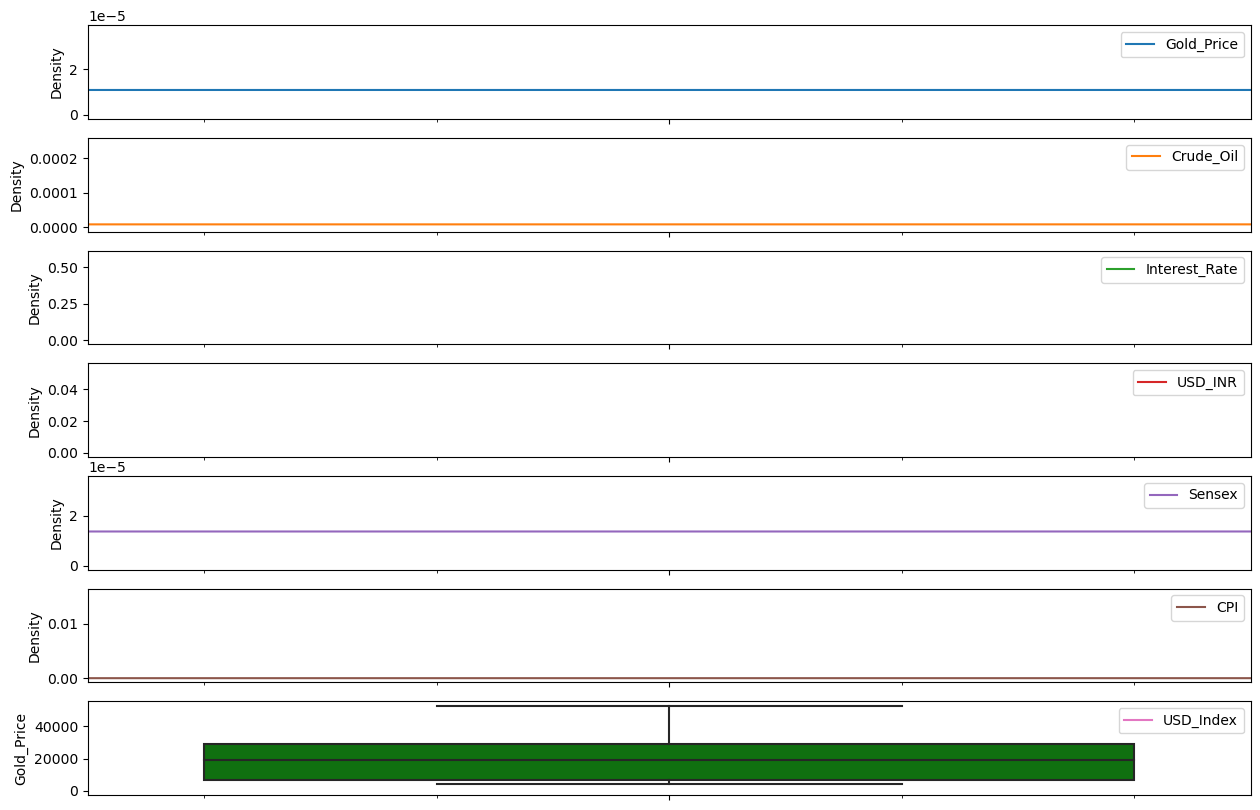

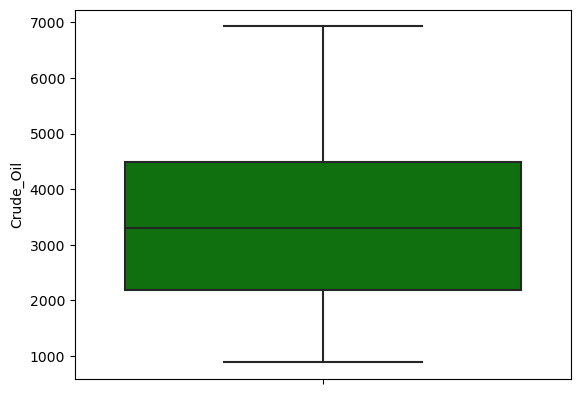

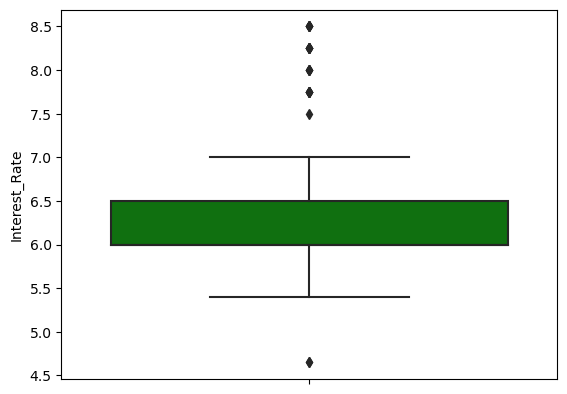

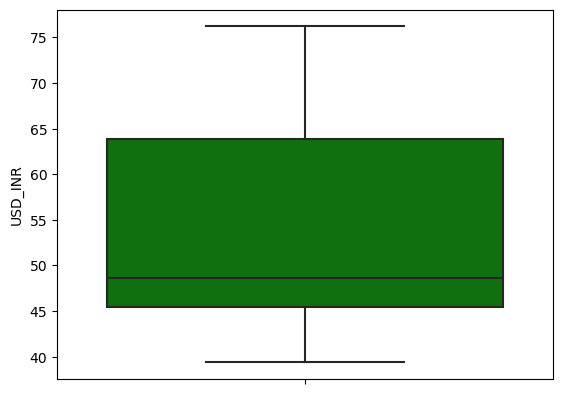

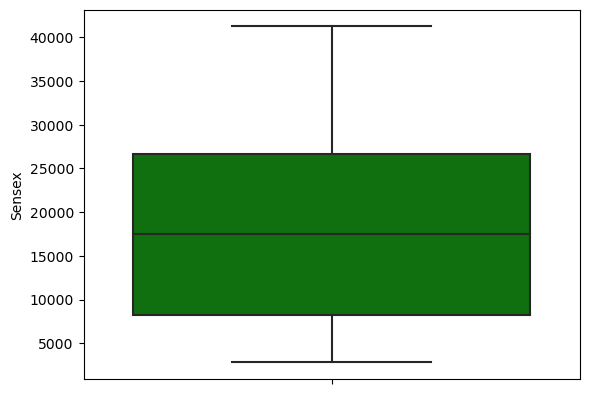

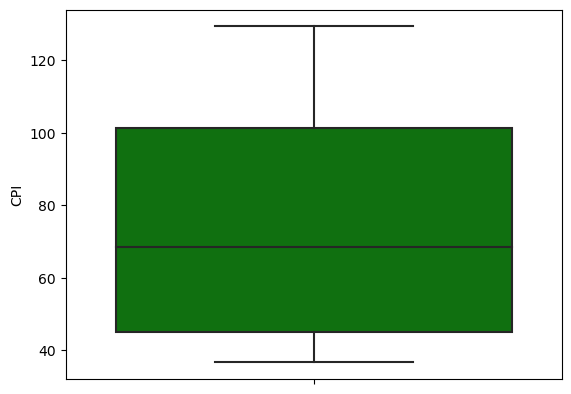

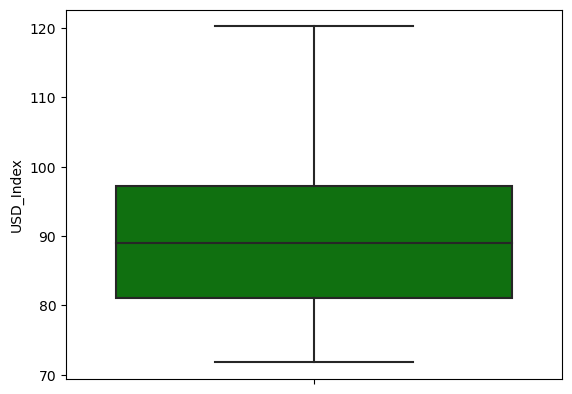

In [14]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.boxplot(y= df[i], color="green")
        plt.show()

In [15]:
df.isnull().mean()*100

Date              0.000000
Gold_Price        0.000000
Crude_Oil         0.000000
Interest_Rate    15.481172
USD_INR           0.000000
Sensex            0.000000
CPI               0.000000
USD_Index         0.000000
dtype: float64

In [16]:
df.Interest_Rate.fillna(df.Interest_Rate.mean(), inplace=True)
df.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538.0,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483.0,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541.0,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466.0,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370.0,1267.18,7.5,46.514595,4247.04,36.73,112.01


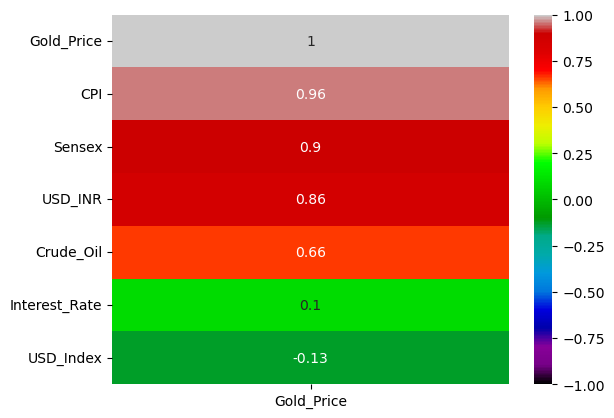

In [35]:
sns.heatmap(df.corr()[["Gold_Price"]].sort_values(by="Gold_Price", ascending=False ), vmin=-1, vmax=1, annot=True, cmap='nipy_spectral');
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    float64
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.1+ KB


In [37]:
x= df[["CPI","Sensex","USD_INR","Crude_Oil"]].values

In [38]:
y = df[['Gold_Price']].values

In [39]:
sc = StandardScaler()

In [40]:
x = sc.fit_transform(x)

### Model selection using cross validation

In [41]:
models = { 
    "LinearRegression": LinearRegression(), 
    "Ridge":Ridge(), 
    "LinearSVR":LinearSVR(), 
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(), 
    "AdaBoostRegressor":AdaBoostRegressor(), 
    "RandomForestRegressor":RandomForestRegressor() 
}

In [42]:
for name, model in models.items(): 
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1) 
    print("cross validation model : {}".format(name)) 
    rmse = np.sqrt(-scores) 
    rmse_average = np.mean(rmse) 
    print("AVERAGE RMSE: ",rmse_average) 
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  2603.6147729022423
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  2530.355303880736
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  19382.647110051294
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3058.3950703562427
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2604.601085837393
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2879.201934125243
*********************************************

### We may select the GradientBoostingRegressor as our model

#### Model building

In [43]:
model = GradientBoostingRegressor()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [45]:
model.fit(x_train, y_train)
print("model traines with{}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
score= r2_score(y_test,model.predict(x_test))*100
mae= mean_absolute_error(y_test,model.predict(x_test))
mse= mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print(" training_score: ", training_score)
print(" testing_score: ", testing_score)
print("mae: ", mae)
print("mse: " ,mse)
print("rmse_test: ",rmse)
print("*"*100)

model traines withGradientBoostingRegressor()
r2score:  99.33207781831413
 training_score:  99.9526664023432
 testing_score:  99.33207781831413
mae:  603.1962727802338
mse:  694844.4929397663
rmse_test:  833.5733278720993
****************************************************************************************************


In [46]:
y_pred = model.predict(x)

In [47]:
OUTPUT= pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,4538.0,4606.974543
1,4483.0,4579.789349
2,4541.0,4495.934496
3,4466.0,4495.934496
4,4370.0,4523.990832


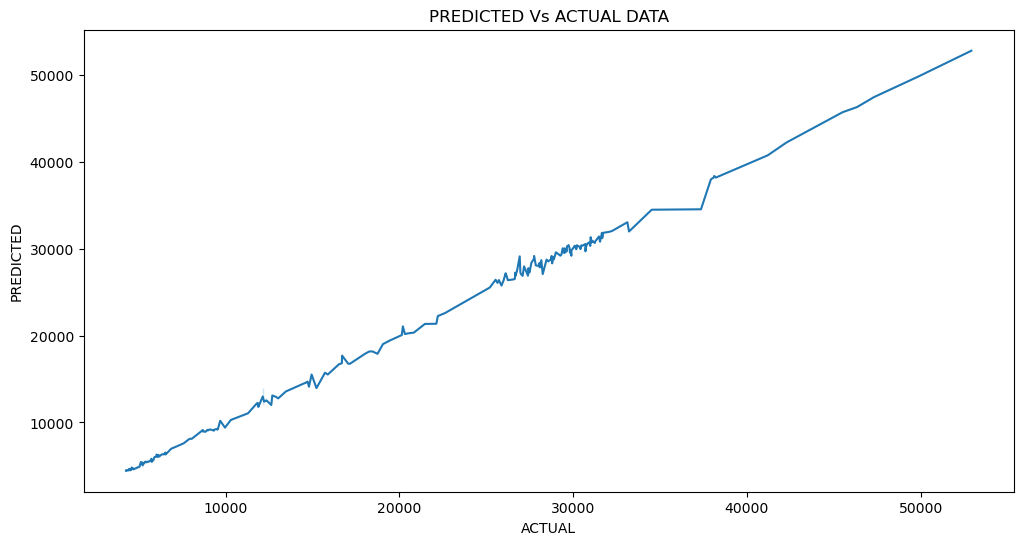

In [48]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED Vs ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y = "PREDICTED");
plt.show()

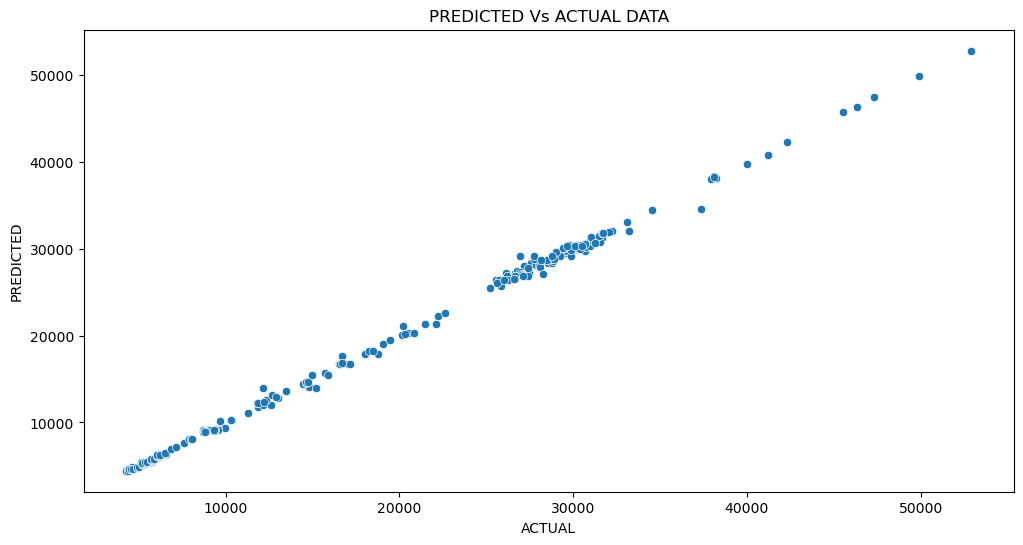

In [49]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED Vs ACTUAL DATA")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y = "PREDICTED");
plt.show()